# Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/fraudulent-transaction-dataset/transaction_data_updated.csv


In [2]:
data = pd.read_csv("../input/fraudulent-transaction-dataset/transaction_data_updated.csv")

In [3]:
data

,Unnamed: 0,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
0,0,737265056,737265056,5000.0,5000.00,2016-08-13T14:27:32,98.55,Uber,US,US,...,2015-03-14,2015-03-14,414,414,1803,PURCHASE,0.00,False,False,False
1,1,737265056,737265056,5000.0,5000.00,2016-10-11T05:05:54,74.51,AMC #191138,US,US,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,True,False,False
2,2,737265056,737265056,5000.0,5000.00,2016-11-08T09:18:39,7.47,Play Store,US,US,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,False,False,False
3,3,737265056,737265056,5000.0,5000.00,2016-12-10T02:14:50,7.47,Play Store,US,US,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,False,False,False
4,4,830329091,830329091,5000.0,5000.00,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,...,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.00,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781202,786358,732852505,732852505,50000.0,48904.96,2016-12-22T18:44:12,119.92,Lyft,US,US,...,2012-08-23,2012-08-23,936,936,3783,PURCHASE,1095.04,False,False,False
781203,786359,732852505,732852505,50000.0,48785.04,2016-12-25T16:20:34,18.89,hulu.com,US,US,...,2012-08-23,2012-08-23,939,939,3388,PURCHASE,1214.96,False,False,False
781204,786360,732852505,732852505,50000.0,48766.15,2016-12-27T15:46:24,49.43,Lyft,US,US,...,2012-08-23,2012-08-23,936,936,3783,PURCHASE,1233.85,False,False,False
781205,786361,732852505,732852505,50000.0,48716.72,2016-12-29T00:30:55,49.89,walmart.com,US,US,...,2012-08-23,2012-08-23,939,939,3388,PURCHASE,1283.28,False,False,False


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781207 entries, 0 to 781206
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                781207 non-null  int64  
 1   accountNumber             781207 non-null  int64  
 2   customerId                781207 non-null  int64  
 3   creditLimit               781207 non-null  float64
 4   availableMoney            781207 non-null  float64
 5   transactionDateTime       781207 non-null  object 
 6   transactionAmount         781207 non-null  float64
 7   merchantName              781207 non-null  object 
 8   acqCountry                781207 non-null  object 
 9   merchantCountryCode       781207 non-null  object 
 10  posEntryMode              781207 non-null  int64  
 11  posConditionCode          781207 non-null  int64  
 12  merchantCategoryCode      781207 non-null  object 
 13  currentExpDate            781207 non-null  o

# Data Pre-processing

In [5]:
data['transactionDateTime'] = pd.to_datetime(data['transactionDateTime'])
data['currentExpDate'] = pd.to_datetime(data['currentExpDate'])
data['accountOpenDate'] = pd.to_datetime(data['accountOpenDate'])
data['dateOfLastAddressChange'] = pd.to_datetime(data['dateOfLastAddressChange'])
data

,Unnamed: 0,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
0,0,737265056,737265056,5000.0,5000.00,2016-08-13 14:27:32,98.55,Uber,US,US,...,2015-03-14,2015-03-14,414,414,1803,PURCHASE,0.00,False,False,False
1,1,737265056,737265056,5000.0,5000.00,2016-10-11 05:05:54,74.51,AMC #191138,US,US,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,True,False,False
2,2,737265056,737265056,5000.0,5000.00,2016-11-08 09:18:39,7.47,Play Store,US,US,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,False,False,False
3,3,737265056,737265056,5000.0,5000.00,2016-12-10 02:14:50,7.47,Play Store,US,US,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,False,False,False
4,4,830329091,830329091,5000.0,5000.00,2016-03-24 21:04:46,71.18,Tim Hortons #947751,US,US,...,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.00,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781202,786358,732852505,732852505,50000.0,48904.96,2016-12-22 18:44:12,119.92,Lyft,US,US,...,2012-08-23,2012-08-23,936,936,3783,PURCHASE,1095.04,False,False,False
781203,786359,732852505,732852505,50000.0,48785.04,2016-12-25 16:20:34,18.89,hulu.com,US,US,...,2012-08-23,2012-08-23,939,939,3388,PURCHASE,1214.96,False,False,False
781204,786360,732852505,732852505,50000.0,48766.15,2016-12-27 15:46:24,49.43,Lyft,US,US,...,2012-08-23,2012-08-23,936,936,3783,PURCHASE,1233.85,False,False,False
781205,786361,732852505,732852505,50000.0,48716.72,2016-12-29 00:30:55,49.89,walmart.com,US,US,...,2012-08-23,2012-08-23,939,939,3388,PURCHASE,1283.28,False,False,False


In [6]:
rob_scaler = RobustScaler()

data['creditLimit'] = rob_scaler.fit_transform(data['creditLimit'].values.reshape(-1, 1))
data['availableMoney'] = rob_scaler.fit_transform(data['availableMoney'].values.reshape(-1, 1))
data['transactionDateTime'] = rob_scaler.fit_transform(data['transactionDateTime'].values.reshape(-1, 1))
data['transactionAmount'] = rob_scaler.fit_transform(data['transactionAmount'].values.reshape(-1, 1))
data['currentExpDate'] = rob_scaler.fit_transform(data['currentExpDate'].values.reshape(-1, 1))
data['accountOpenDate'] = rob_scaler.fit_transform(data['accountOpenDate'].values.reshape(-1, 1))
data['dateOfLastAddressChange'] = rob_scaler.fit_transform(data['dateOfLastAddressChange'].values.reshape(-1, 1))
data['currentBalance'] = rob_scaler.fit_transform(data['currentBalance'].values.reshape(-1, 1))

In [7]:
data.drop(['merchantName', 'accountNumber', 'customerId', 'Unnamed: 0'], axis = 1, inplace = True)
data

,creditLimit,availableMoney,transactionDateTime,transactionAmount,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
0,-0.25,0.282762,0.200203,0.067397,US,US,2,1,rideshare,-0.487981,0.281899,-0.502471,414,414,1803,PURCHASE,-0.532933,False,False,False
1,-0.25,0.282762,0.522681,-0.084880,US,US,9,1,entertainment,-0.389824,0.281899,-0.502471,486,486,767,PURCHASE,-0.532933,True,False,False
2,-0.25,0.282762,0.677705,-0.509533,US,US,9,1,mobileapps,-0.170673,0.281899,-0.502471,486,486,767,PURCHASE,-0.532933,False,False,False
3,-0.25,0.282762,0.852153,-0.509533,US,US,9,1,mobileapps,-0.170673,0.281899,-0.502471,486,486,767,PURCHASE,-0.532933,False,False,False
4,-0.25,0.282762,-0.579576,-0.105973,US,US,2,1,fastfood,0.439103,0.497033,-0.263591,885,885,3143,PURCHASE,-0.532933,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781202,4.25,7.118618,0.921958,0.202762,US,US,90,1,rideshare,-0.560897,-1.102374,-2.039539,936,936,3783,PURCHASE,-0.294958,False,False,False
781203,4.25,7.099947,0.937916,-0.437195,US,US,9,1,online_subscriptions,-0.463542,-1.102374,-2.039539,939,939,3388,PURCHASE,-0.268897,False,False,False
781204,4.25,7.097006,0.948789,-0.243745,US,US,2,1,rideshare,-0.170673,-1.102374,-2.039539,936,936,3783,PURCHASE,-0.264792,False,False,False
781205,4.25,7.089310,0.956296,-0.240831,US,US,9,99,online_retail,-0.622196,-1.102374,-2.039539,939,939,3388,PURCHASE,-0.254050,False,False,False


In [8]:
encoder = LabelEncoder()

for column in data.columns:
    if data.dtypes[column] == 'object':
        data[column] = encoder.fit_transform(data[column])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781207 entries, 0 to 781206
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   creditLimit               781207 non-null  float64
 1   availableMoney            781207 non-null  float64
 2   transactionDateTime       781207 non-null  float64
 3   transactionAmount         781207 non-null  float64
 4   acqCountry                781207 non-null  int64  
 5   merchantCountryCode       781207 non-null  int64  
 6   posEntryMode              781207 non-null  int64  
 7   posConditionCode          781207 non-null  int64  
 8   merchantCategoryCode      781207 non-null  int64  
 9   currentExpDate            781207 non-null  float64
 10  accountOpenDate           781207 non-null  float64
 11  dateOfLastAddressChange   781207 non-null  float64
 12  cardCVV                   781207 non-null  int64  
 13  enteredCVV                781207 non-null  i

In [10]:
data = pd.DataFrame(rob_scaler.fit_transform(data), columns = data.columns)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781207 entries, 0 to 781206
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   creditLimit               781207 non-null  float64
 1   availableMoney            781207 non-null  float64
 2   transactionDateTime       781207 non-null  float64
 3   transactionAmount         781207 non-null  float64
 4   acqCountry                781207 non-null  float64
 5   merchantCountryCode       781207 non-null  float64
 6   posEntryMode              781207 non-null  float64
 7   posConditionCode          781207 non-null  float64
 8   merchantCategoryCode      781207 non-null  float64
 9   currentExpDate            781207 non-null  float64
 10  accountOpenDate           781207 non-null  float64
 11  dateOfLastAddressChange   781207 non-null  float64
 12  cardCVV                   781207 non-null  float64
 13  enteredCVV                781207 non-null  f

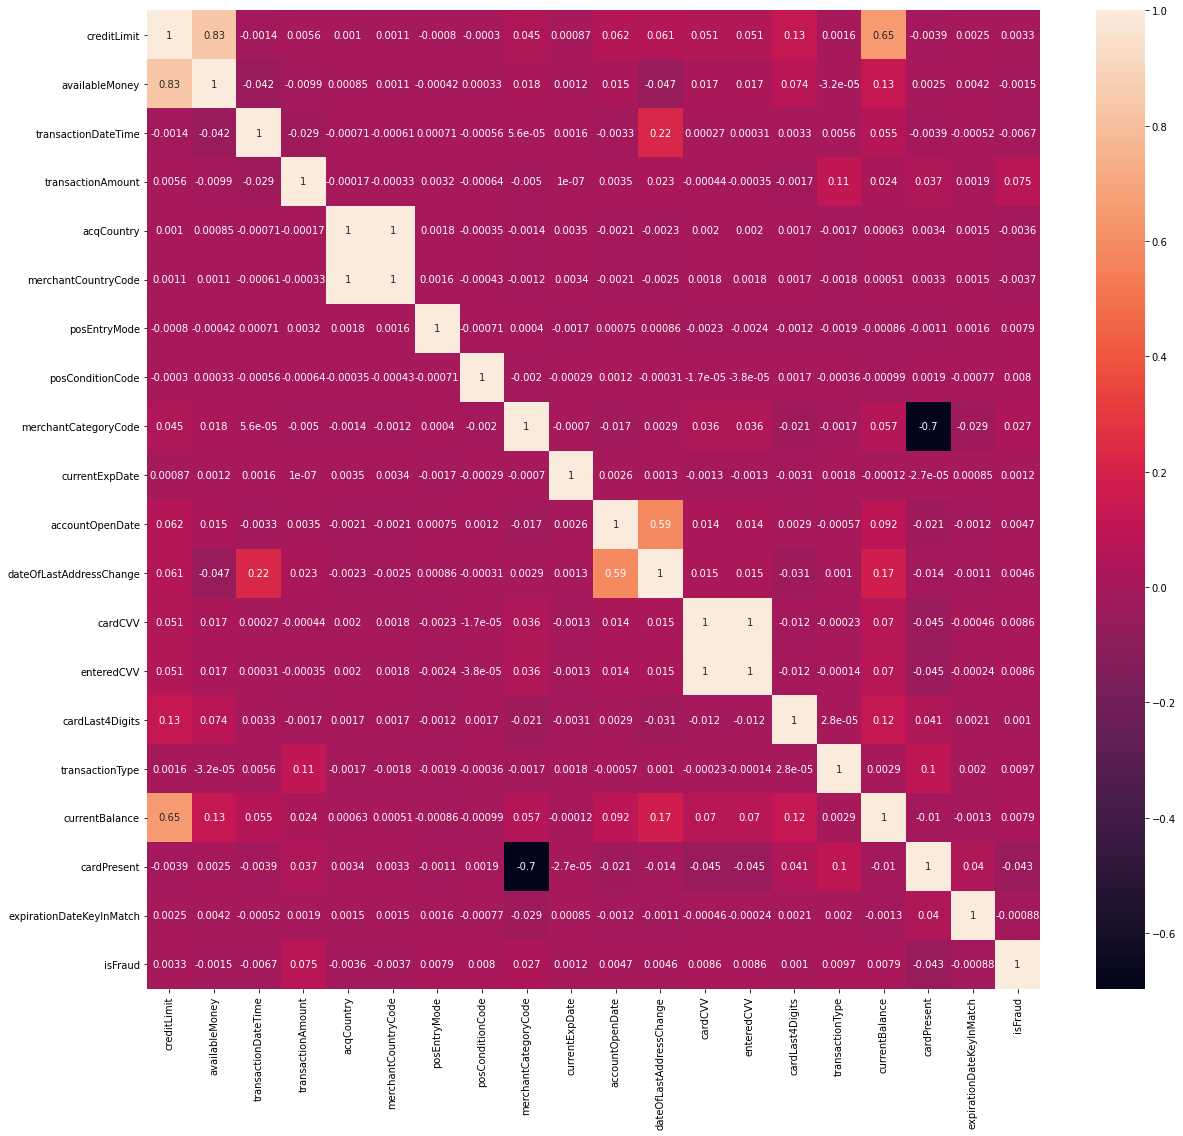

In [12]:
plt.figure(figsize = (20, 18))
sns.heatmap(data.corr(), annot = True)
plt.show()

# Data Spliting for model training

In [13]:
X = data.drop('isFraud', axis = 1)
y = data.isFraud

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, stratify = y, random_state = 2)

In [15]:
print(X.shape, X_train.shape, X_test.shape)

(781207, 19) (507784, 19) (273423, 19)


# Model training

In [16]:
model = LogisticRegression(solver = 'liblinear')

In [17]:
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

# Scores

In [18]:
X_train_pred = model.predict(X_train)
training_data_acc = accuracy_score(X_train_pred, y_train)

In [19]:
print("Accuracy on training data : " + str(training_data_acc * 100) + " %")

Accuracy on training data : 98.44894679627558 %


In [20]:
X_test_pred = model.predict(X_test)
testing_data_acc = accuracy_score(X_test_pred, y_test)

In [21]:
print("Accuracy on testing data : " + str(testing_data_acc * 100) + " %")

Accuracy on testing data : 98.44892346291277 %
